# **Data in Design, AI for Urban Data and Visualization**

#### Data, Design Computation, Artificial Intelligence, Visualization, Harvard GSD


**KEYWORD:**
Vector, Raster, Urban Data, GIS, Data Processing, Data Mining, Machine Learning, Artificial Intelligence, Visualization, Mapping, Design Decision-Making

-----

#### Instructor : NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

# Map(image) classifier

In [1]:
from PIL import Image
import os, os.path

In [2]:
path = "datasetMapping/"
valid_images = ["jpg","gif","png"]

pathSave = "data/"

mapPathList = []
otherPathList = []

for p in os.listdir(path):
    thePath = os.listdir(path + p + "/map/")
    # print(thePath)
    for f in thePath:
        filePath = path + p + "/map/" + f
        mapPathList.append(filePath)

    thePath = os.listdir(path + p + "/other/")
    # print(thePath)
    for f in thePath:
        filePath = path + p + "/other/" + f
        otherPathList.append(filePath)

In [3]:
print(len(mapPathList))
print(len(otherPathList))

0
0


In [4]:
pathRoot = 'mapTrainA/'
pathTrain = pathRoot + 'dataTrain/'
pathValidation = pathRoot + 'dataValidation/'

folders = ['map', 'other']

for f in folders:
    for file in os.scandir(pathTrain + f):
        os.remove(file.path)

for f in folders:
    for file in os.scandir(pathValidation + f):
        os.remove(file.path)

In [5]:
import random

indexTrain = 0
indexVal = 0
splitRatio = 0.3

for path in mapPathList:

    try:
        if random.random() > splitRatio:
            print('index train:', indexTrain)
            img = Image.open(path)
            img = img.resize((512, 512))
            img = img.convert('RGB')
            thePathSave = pathTrain + "map/" + str(indexTrain) + '.jpg'
            img.save(thePathSave)
            indexTrain += 1
        else:
            print('index validation:', indexVal)
            img = Image.open(path)
            img = img.resize((512, 512))
            img = img.convert('RGB')
            thePathSave = pathValidation + "map/" + str(indexVal) + '.jpg'
            img.save(thePathSave)
            indexVal += 1
    except:
        pass
print("============================")
print('train(map): ', indexTrain)
print('validation(map): ', indexVal)

train(map):  0
validation(map):  0


In [6]:
indexTrain = 0
indexVal = 0

for path in otherPathList:
    try:
        if random.random() > splitRatio:
            print('index train:', indexTrain)
            img = Image.open(path)
            img = img.resize((512, 512))
            img = img.convert('RGB')
            thePathSave = pathTrain + "other/" + str(indexTrain) + '.jpg'
            img.save(thePathSave)
            indexTrain += 1
        else:
            print('index validataion:', indexVal)
            img = Image.open(path)
            img = img.resize((512, 512))
            img = img.convert('RGB')
            thePathSave = pathValidation + "other/" + str(indexVal) + '.jpg'
            img.save(thePathSave)
            indexVal += 1
    except:
        pass
print("============================")
print('train(other): ', indexTrain)
print('validation(other): ', indexVal)

train(other):  0
validation(other):  0


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img


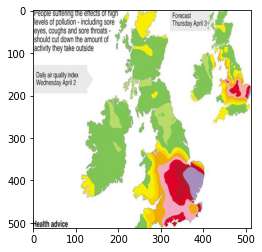

In [13]:
image = load_img('mapTrainA/dataTrain/map/0.jpg')
plt.imshow(image)

In [19]:
img_width=150
img_height=150
batch_size=20
input_shape = (img_width, img_height, 3)

In [20]:

# https://www.tensorflow.org/tutorials/load_data/images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(
    rescale = 1./ 255,
    shear_range = 0.3,
    zoom_range = [0.6,1.0],
    brightness_range = [0.6,1.0],
    rotation_range = 90,
    horizontal_flip = True,
    validation_split = 0.2
)

#---------------------------------------------

train_generator = train_datagen.flow_from_directory(
    'mapTrainA/dataTrain',
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    seed = 42,
    subset='training'
    
)

#---------------------------------------------

valid_generator = train_datagen.flow_from_directory(
    'mapTrainA/dataValidation',
    target_size = (img_width, img_height),
    batch_size = batch_size,
    #class_mode='binary',
    class_mode = 'categorical',
    seed = 42,
    subset='validation'
    
)

Found 9026 images belonging to 2 classes.
Found 958 images belonging to 2 classes.


In [21]:
X, y = next(train_generator)

In [22]:
y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

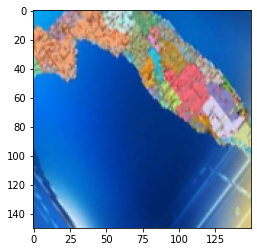

In [23]:
X[2]
plt.imshow(X[0])

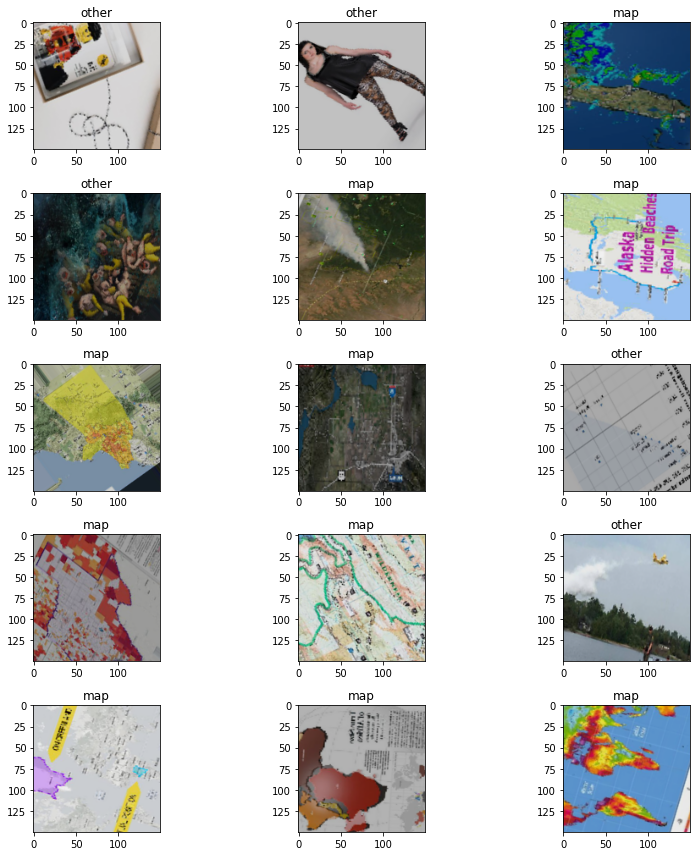

In [24]:
className = ['map', 'other']

plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.title(className[np.argmax(Y_batch[0])])
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
epochs = 30
train_samples = 300
validation_samples = 300

hist = model.fit(
    train_generator,
    steps_per_epoch= train_samples // batch_size,
    validation_data=valid_generator,
    validation_steps=validation_samples // batch_size,
    epochs=epochs,
    )

Epoch 1/30
15/15 [==============================] - 25s 458ms/step - loss: 0.7280 - accuracy: 0.6249 - val_loss: 0.6485 - val_accuracy: 0.6500
Epoch 2/30
15/15 [==============================] - 5s 369ms/step - loss: 0.6437 - accuracy: 0.6393 - val_loss: 0.6428 - val_accuracy: 0.6300
Epoch 3/30
15/15 [==============================] - 7s 479ms/step - loss: 0.6414 - accuracy: 0.6026 - val_loss: 0.6396 - val_accuracy: 0.6533
Epoch 4/30
15/15 [==============================] - 6s 425ms/step - loss: 0.6395 - accuracy: 0.6713 - val_loss: 0.5935 - val_accuracy: 0.7367
Epoch 5/30
15/15 [==============================] - 6s 405ms/step - loss: 0.6524 - accuracy: 0.6646 - val_loss: 0.6781 - val_accuracy: 0.6467
Epoch 6/30
15/15 [==============================] - 6s 404ms/step - loss: 0.5936 - accuracy: 0.7357 - val_loss: 0.5787 - val_accuracy: 0.7233
Epoch 7/30
15/15 [==============================] - 6s 398ms/step - loss: 0.5786 - accuracy: 0.7252 - val_loss: 0.6607 - val_accuracy: 0.6733
Epoch

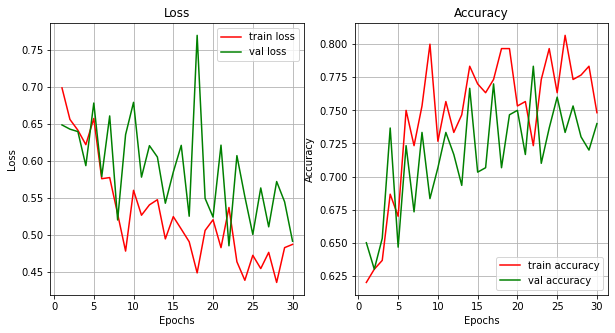

In [29]:
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

In [30]:
modelSecond = Sequential()
modelSecond.add(Conv2D(128, (3, 3), input_shape=input_shape))
modelSecond.add(Activation('relu'))
modelSecond.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

modelSecond.add(Conv2D(128, (3, 3)))
modelSecond.add(Activation('relu'))
modelSecond.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

modelSecond.add(Conv2D(128, (3, 3)))
modelSecond.add(Activation('relu'))
modelSecond.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

modelSecond.add(Dropout(0.30))

modelSecond.add(Flatten())
modelSecond.add(Dense(128))
modelSecond.add(Activation("relu"))
modelSecond.add(Dense(64))
modelSecond.add(Activation('relu'))
modelSecond.add(Dropout(0.30))
modelSecond.add(Dense(2))
modelSecond.add(Activation("sigmoid"))

In [31]:
modelSecond.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
epochs = 30
train_samples = 500
validation_samples = 500

histSecond = modelSecond.fit(
    train_generator,
    steps_per_epoch= train_samples // batch_size,
    validation_data=valid_generator,
    validation_steps=validation_samples // batch_size,
    epochs=epochs,
    # verbose=2,
    )

Epoch 1/30
25/25 [==============================] - 16s 375ms/step - loss: 0.7132 - accuracy: 0.5369 - val_loss: 0.6807 - val_accuracy: 0.5780
Epoch 2/30
25/25 [==============================] - 11s 454ms/step - loss: 0.6828 - accuracy: 0.5646 - val_loss: 0.6704 - val_accuracy: 0.7229
Epoch 3/30
25/25 [==============================] - 10s 421ms/step - loss: 0.6602 - accuracy: 0.7152 - val_loss: 0.6569 - val_accuracy: 0.6660
Epoch 4/30
25/25 [==============================] - 9s 386ms/step - loss: 0.6141 - accuracy: 0.7299 - val_loss: 0.6451 - val_accuracy: 0.7269
Epoch 5/30
25/25 [==============================] - 10s 408ms/step - loss: 0.6181 - accuracy: 0.7957 - val_loss: 0.6313 - val_accuracy: 0.7000
Epoch 6/30
25/25 [==============================] - 10s 420ms/step - loss: 0.5708 - accuracy: 0.7684 - val_loss: 0.6043 - val_accuracy: 0.7309
Epoch 7/30
25/25 [==============================] - 10s 417ms/step - loss: 0.5702 - accuracy: 0.7443 - val_loss: 0.6129 - val_accuracy: 0.7080


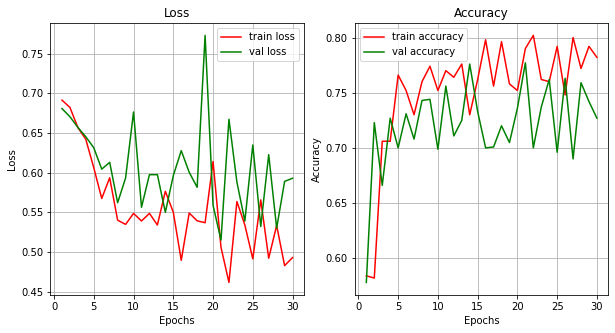

In [33]:
historyData = histSecond.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

In [34]:
modelThird = Sequential()
modelThird.add(Conv2D(128, (3, 3), input_shape=input_shape))
modelThird.add(Activation('relu'))
modelThird.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

modelThird.add(Conv2D(128, (3, 3)))
modelThird.add(Activation('relu'))
modelThird.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

modelThird.add(Conv2D(128, (3, 3)))
modelThird.add(Activation('relu'))
modelThird.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

modelThird.add(Dropout(0.30))

modelThird.add(Flatten())
modelThird.add(Dense(128))
modelThird.add(Activation("relu"))
modelThird.add(Dropout(0.30))
modelThird.add(Dense(64))
modelThird.add(Activation('relu'))
modelThird.add(Dropout(0.30))
modelThird.add(Dense(2))
modelThird.add(Activation("sigmoid"))
modelThird.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
from keras.callbacks import EarlyStopping

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')

epochs = 30
train_samples = 2000
validation_samples = 2000

histThird = modelThird.fit(
    train_generator,
    steps_per_epoch = train_samples // batch_size,
    validation_data = valid_generator,
    validation_steps = validation_samples // batch_size,
    epochs = epochs,
    callbacks = [earlystop],
    # verbose=2,
    )

Epoch 1/30
100/100 [==============================] - 42s 403ms/step - loss: 0.7030 - accuracy: 0.5848 - val_loss: 0.6315 - val_accuracy: 0.7064
Epoch 2/30
100/100 [==============================] - 34s 340ms/step - loss: 0.5887 - accuracy: 0.7537 - val_loss: 0.5994 - val_accuracy: 0.7054
Epoch 3/30
100/100 [==============================] - 35s 358ms/step - loss: 0.5959 - accuracy: 0.7244 - val_loss: 0.5514 - val_accuracy: 0.7430
Epoch 4/30
100/100 [==============================] - 35s 348ms/step - loss: 0.4934 - accuracy: 0.7939 - val_loss: 0.5743 - val_accuracy: 0.7239
Epoch 5/30
100/100 [==============================] - 35s 353ms/step - loss: 0.5319 - accuracy: 0.7680 - val_loss: 0.5591 - val_accuracy: 0.7350
Epoch 6/30
100/100 [==============================] - 36s 368ms/step - loss: 0.5258 - accuracy: 0.7656 - val_loss: 0.5342 - val_accuracy: 0.7209
Epoch 7/30
100/100 [==============================] - 33s 335ms/step - loss: 0.5093 - accuracy: 0.7771 - val_loss: 0.5463 - val_ac

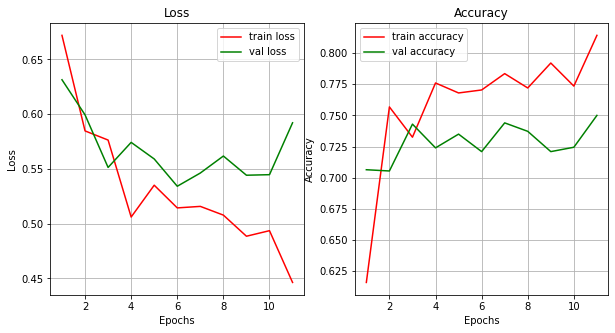

In [36]:
historyData = histThird.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

In [37]:
nameMode = 'map_image_classifier_cnn_model_A.h5'
# model.save(nameMode)
# modelSecond.save(nameMode)
modelThird.save(nameMode)

In [38]:
# load the saved model
import keras
from keras.preprocessing.image import load_img
import pandas as pd

nameMode = 'map_image_classifier_cnn_model_A.h5'
model_loaded = keras.models.load_model(nameMode)

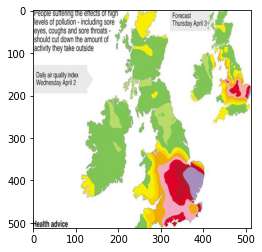

In [39]:
image = load_img('mapTrainA/dataTrain/map/0.jpg')
plt.imshow(image)

In [40]:
x = image.resize((150, 150))
x = np.array(x)/255.0
result = model_loaded.predict(x[np.newaxis, ...])
df = pd.DataFrame(data =result,columns=['map','other'])
df

,map,other
0,0.971974,0.026241


In [41]:
import urllib.request
# urllib.request.urlretrieve('https://raw.githubusercontent.com/NamjuLee/data/master/img/map/ShadedReliefMap.jpg', "image.jpg")
urllib.request.urlretrieve('https://www.boredpanda.com/blog/wp-content/uuuploads/fun-maps/fun-maps-31.jpg', "image.jpg")

('image.jpg', <http.client.HTTPMessage at 0x1677eda5d00>)

,map,no map
0,0.965731,0.032432


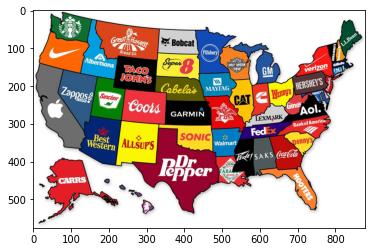

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

x = Image.open('image.jpg')
plt.imshow(x)
x = np.array(x.resize((150, 150)))/255.
result = model_loaded.predict(x[np.newaxis, ...])
df = pd.DataFrame(data =result,columns=['map','no map'])
df

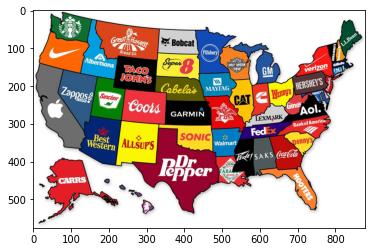

        map     other
0  0.965731  0.032432


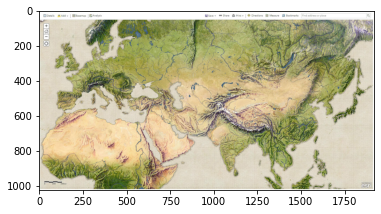

        map     other
0  0.985404  0.013395


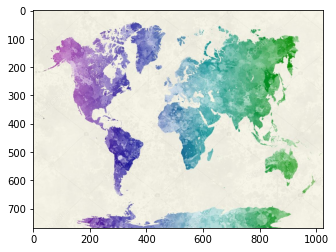

        map     other
0  0.828419  0.168681


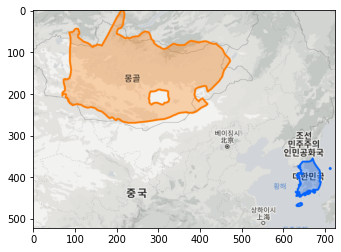

        map     other
0  0.965608  0.030313


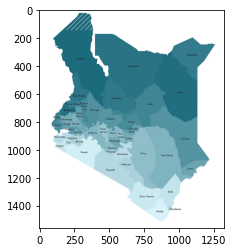

        map     other
0  0.856203  0.134523


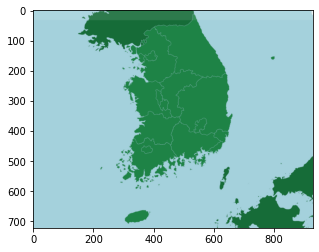

        map     other
0  0.944917  0.049882


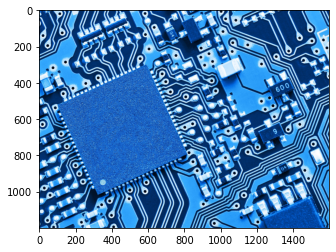

        map    other
0  0.155323  0.85603


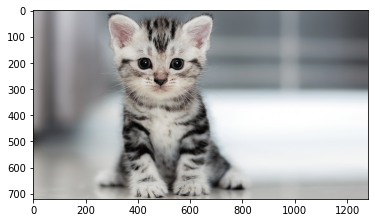

        map     other
0  0.082152  0.915727


In [43]:
urls = [
    'https://www.boredpanda.com/blog/wp-content/uuuploads/fun-maps/fun-maps-31.jpg',
    'https://raw.githubusercontent.com/NamjuLee/data/master/img/map/ShadedReliefMap.jpg',
    'https://st2.depositphotos.com/1047308/7670/i/950/depositphotos_76706353-stock-photo-world-map-in-watercolor-cool.jpg',
    'https://blog.kakaocdn.net/dn/1NFJH/btq9C8XcSOA/jJ4k3PaD6AQxGDfmo4qBi0/img.png',
    'https://www.worldatlas.com/r/w1200/upload/ab/e1/d6/counties-of-kenya-map.png',
    'https://www.geoguessr.com/seterra/mapimage/3180.png',
    'https://images.news18.com/ibnlive/uploads/2021/11/computer-memory-chip-16359034464x3.png',
    'https://ga-petfoodpartners.co.uk/content/uploads/2021/07/Kitten-Header-Image.png',
]

for url in urls:
    urllib.request.urlretrieve(url, "image.jpg")
    x = Image.open('image.jpg')
    x = x.convert('RGB')
    plt.imshow(x)
    plt.show()
    x = np.array(x.resize((150, 150)))/255.
    result = model_loaded.predict(x[np.newaxis, ...])
    df = pd.DataFrame(data =result,columns=['map','other'])
    print(df)
    print('===========================================================================')
